In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("Train.csv").values
test = pd.read_csv("Test.csv").values

In [9]:
X = df[:,:-1]
y = df[:,-1]

In [13]:
print(X.shape)
print(y.shape)

(1600, 5)
(1600,)


In [15]:
u = np.mean(X,axis = 0)
std = np.std(X,axis = 0)



In [16]:
X = (X-u)/std

In [17]:
def hypothesis(X,theta):
    
    return np.dot(X,theta)
def error(X,y,theta):
    e = 0.0
    m =X.shape[0]
   
    y_ = hypothesis(X,theta)
    
    e = np.sum((y_ - y)**2)
    return e/m
def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m
def gradient_descent(X,y,lr =0.1,max_itr = 300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_itr):
        e = error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        theta = theta - lr*grad
    return theta,error_list    

In [18]:
theta,error_list = gradient_descent(X,y)

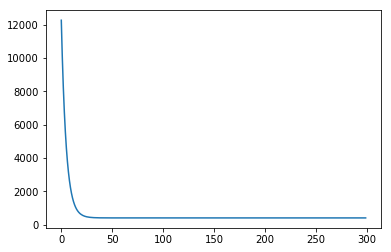

In [19]:
plt.plot(error_list)
plt.show()

In [21]:
theta

array([29.59359198, 94.65067706,  8.37544469, 45.52303635,  2.46461552])

In [28]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1-num/denom)
    return score*100


In [29]:
y_ = hypothesis(X,theta)
print(r2_score(y,y_))

96.60856726304088


In [23]:
y_test = hypothesis(test,theta)
print(y_test.shape)

(400,)


In [24]:
df = pd.DataFrame(data = y_test,columns=["target"])

In [25]:
print(df.head())

       target
0  111.832848
1  115.560932
2  -26.195097
3  -47.954675
4 -102.836817


In [26]:
df.to_csv('y_prediction.csv',index = True)

In [27]:
print(test.shape)


(400, 5)
